6 Exercise: Building a Fully Connected Network (FCN) for
Devnagari Digit Classification.
Objective
In this exercise, you will build and train a Fully Connected Network (FCN) to classify Devnagari digits
using TensorFlow and Keras. You will manually load and process the dataset using the Python Imaging
Library (PIL) and then train the model with three hidden layers.

Task 1: Data Preparation

Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Training set: (2370, 28, 28, 1), Labels: (2370, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


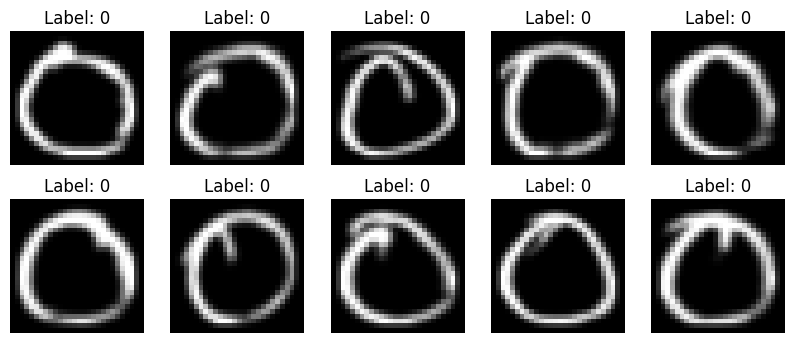

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image  # Image processing with Pillow

# Task 1: Load & Preprocess Data
# -----------------------------------------------
# Define dataset paths
train_dir = "/content/drive/MyDrive/worksheet 4/Copy of devnagari digit (1)/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/worksheet 4/Copy of devnagari digit (1)/DevanagariHandwrittenDigitDataset/Test"
img_height, img_width = 28, 28  # Image dimensions

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Assign numerical labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixels (0-1)
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load dataset
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

Task 2: Build the FCN Model
Model Architecture
• Create a Sequential model using Keras.
• Add 3 hidden layers with the following number of neurons:
– 1st hidden layer: 64 neurons
– 2nd hidden layer: 128 neurons
– 3rd hidden layer: 256 neurons
• Use sigmoid activation functions for all hidden layers.
• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
softmax activation function.

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten input
    Dense(64, activation='sigmoid'),   # 1st hidden layer
    Dense(128, activation='sigmoid'),  # 2nd hidden layer
    Dense(256, activation='sigmoid'),  # 3rd hidden layer
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

Task 3: Compile the Model
Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [20]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Task 4: Train the Model
Model Training
• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.
• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.
• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [21]:
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    validation_split=0.2,  # Use 20% of training data for validation
                    epochs=20,
                    batch_size=128,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3596 - loss: 1.5397    

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4670 - loss: 1.3249 - val_accuracy: 0.0000e+00 - val_loss: 3.0754
Epoch 2/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.3516 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8958 - loss: 0.3445 - val_accuracy: 0.0000e+00 - val_loss: 1.8804
Epoch 3/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8978 - loss: 0.2948 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8971 - loss: 0.2923 - val_accuracy: 0.0000e+00 - val_loss: 1.6192
Epoch 4/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9035 - loss: 0.2280  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9011 - loss: 0.2249 - val_accuracy: 0.0000e+00 - val_loss: 1.0201
Epoch 5/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9073 - loss: 0.1403  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9166 - loss: 0.1339 - val_accuracy: 0.9367 - val_loss: 0.3972
Epoch 6/20
10/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0535  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0504 - val_accuracy: 0.9747 - val_loss: 0.1854
Epoch 7/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0222  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0209 - val_accuracy: 0.9810 - val_loss: 0.0973
Epoch 8/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0106  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9810 - val_loss: 0.0841
Epoch 9/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0070  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.9831 - val_loss: 0.0704
Epoch 10/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0051  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9852 - val_loss: 0.0621
Epoch 11/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0038  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9852 - val_loss: 0.0598
Epoch 12/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0035  

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9873 - val_loss: 0.0554
Epoch 13/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0029 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9873 - val_loss: 0.0538
Epoch 14/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0024 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9873 - val_loss: 0.0534
Epoch 15/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0022 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9873 - val_loss: 0.0519
Epoch 16/20
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9873 - val_loss: 0.0517
Epoch 17/20
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9873 - val_loss: 0.0505
Epoch 18/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0016

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9873 - val_loss: 0.0503
Epoch 19/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0014

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9895 - val_loss: 0.0492
Epoch 20/20
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0013

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9895 - val_loss: 0.0489


Task 5: Evaluate the Model
Model Evaluation
• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 4.8652
Test Accuracy: 0.1970, Test Loss: 8.0930


Task 6: Save and Load the Model
Model Saving and Loading
• Save the trained model to an .h5 file using model.save().
• Load the saved model and re-evaluate its performance on the test set.

In [24]:
model.save("devnagari_digit_classifier.h5")

In [25]:
loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


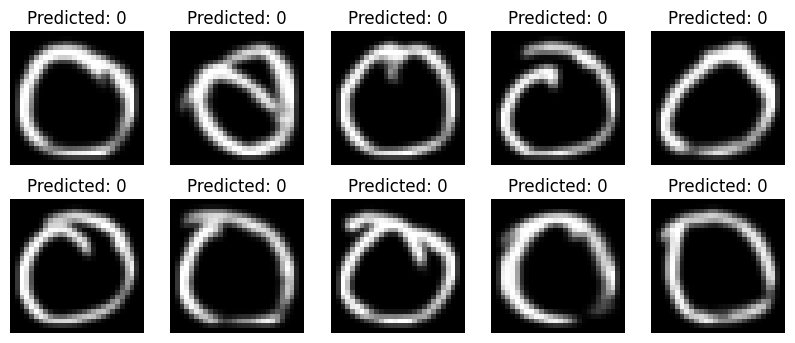

In [26]:
predictions = loaded_model.predict(x_test[:10])  # Predict on first 10 test images
predicted_labels = np.argmax(predictions, axis=1)

# Display Predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis("off")
plt.show()
